In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import time
import matplotlib as plt

Using TensorFlow backend.


In [2]:
#read library for visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Import and save images

In [3]:
data=[]
labels=[]
car=os.listdir("./images/car")
for a in car:
    try:
        image=cv2.imread("./images/car/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        #nor_image = WEI(3,size_image)
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")
        
cat=os.listdir("./images/cat")
for b in cat:
    try:
        image=cv2.imread("./images/cat/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
#         nor_image = WEI(3,size_image)
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
        
dog=os.listdir("./images/dog")
for c in dog:
    try:
        image=cv2.imread("./images/dog/"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
#         nor_image = WEI(3,size_image)
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")
        
phone=os.listdir("./images/phone")
for d in phone:
    try:
        image=cv2.imread("./images/phone/"+d)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
#         nor_image = WEI(3,size_image)
        data.append(np.array(size_image))
        labels.append(3)
    except AttributeError:
        print("")

In [4]:
Datas = np.array(data)
labels = np.array(labels)

In [5]:
np.save("Datas",Datas)
np.save("labels",labels)

In [6]:
Datas=np.load("Datas.npy")
labels=np.load("labels.npy")

## 平均化

In [5]:
def WEI(alpha,img):
    padd1 = np.zeros((alpha - 1, img.shape[1],3))
    padd2 = np.zeros((img.shape[0]+ 2*alpha -2, alpha -1,3))
    
    a1=np.concatenate((np.concatenate((padd1, img), axis=0),padd1), axis=0)
    a2=np.concatenate((np.concatenate((padd2, a1), axis=1),padd2), axis=1)
    
    result = []
    for i in range(0, img.shape[0]):
        tmp = []
        for j in range(0, img.shape[1]):
            sumR = 0
            sumG = 0
            sumB = 0
            for a in range(0, alpha):
                for b in range(0, alpha):
                    sumR += a2[i + a][j + b][0]
                    sumG += a2[i + a][j + b][1]
                    sumB += a2[i + a][j + b][2]
            sum = [sumR/alpha/alpha,sumG/alpha/alpha,sumB/alpha/alpha]
            tmp.append(sum)
        result.append(tmp)
    return np.array(result)

In [6]:
norm_image = []
for i in range(0,len(data)):
    norm_image.append(WEI(3,data[i]))

In [7]:
print(norm_image)

[array([[[ 3.        ,  2.        ,  2.33333333],
        [ 5.88888889,  4.11111111,  4.77777778],
        [ 8.11111111,  5.77777778,  6.66666667],
        ...,
        [ 0.55555556,  0.55555556,  0.55555556],
        [ 0.44444444,  0.44444444,  0.44444444],
        [ 0.33333333,  0.33333333,  0.33333333]],

       [[ 6.11111111,  4.11111111,  4.77777778],
        [12.11111111,  8.55555556,  9.88888889],
        [16.66666667, 12.        , 13.77777778],
        ...,
        [ 1.22222222,  1.22222222,  1.22222222],
        [ 0.88888889,  0.88888889,  0.88888889],
        [ 0.66666667,  0.66666667,  0.66666667]],

       [[ 9.55555556,  6.55555556,  7.55555556],
        [18.88888889, 13.55555556, 15.55555556],
        [25.88888889, 18.88888889, 21.55555556],
        ...,
        [ 2.        ,  2.        ,  2.        ],
        [ 1.33333333,  1.33333333,  1.33333333],
        [ 1.        ,  1.        ,  1.        ]],

       ...,

       [[11.55555556, 11.22222222, 16.55555556],
        [2

In [8]:
Norm_Datas = np.array(norm_image)

## data processing

In [7]:
s=np.arange(Datas.shape[0])
np.random.shuffle(s)
Datas=Datas[s]
labels=labels[s]

In [8]:
num_classes=len(np.unique(labels))
len_data=len(Datas)

In [9]:
(x_train,x_test)=Datas[(int)(0.99*len_data):],Datas[:(int)(0.99*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [10]:
(y_train,y_test)=labels[(int)(0.99*len_data):],labels[:(int)(0.99*len_data)]

In [11]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [12]:
img_rows, img_cols = 64,64
img_channels = 3

In [13]:
# Adjustment of input type of dimension number due to difference of backend

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

## Visualizing data

In [14]:
#preparing label name
labelss = np.array([
    'car',
    'cat',
    'dog',
    'phone'])

In [15]:
#Store 10 images for each label
img_list = []
for for_1 in range(len(labelss)):
    for_2=keras.utils.to_categorical(for_1,num_classes)
    choice_idx = np.random.choice(np.where(labels == for_1)[0], 5)
    img_list.append(x_test[choice_idx])

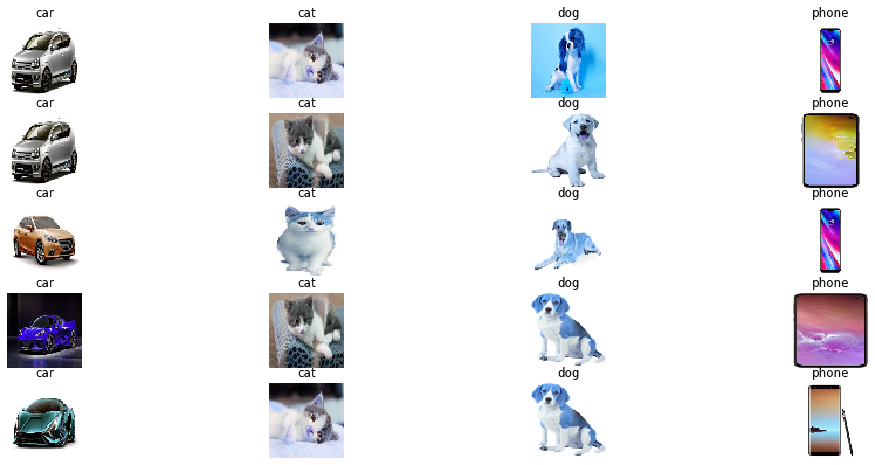

In [19]:
# Visualization of data
fig, ax = plt.subplots(5, 4, figsize=(18, 8))
for for_1 in range(len(labelss)):
    
    for for_2 in range(5):
        ax[for_2][for_1].imshow(img_list[for_1][for_2].reshape(64, 64, 3)) #Outputs the nth and subsequent test data with the value of for_2 + n
        ax[for_2][for_1].set_title(labelss[for_1])
        ax[for_2][for_1].axis('off')

## testing

In [33]:
import keras
import keras_resnet.models
shape, classes = (32, 32, 3), 10

x = keras.layers.Input(shape)

model = keras_resnet.models.ResNet50(x, classes=classes)
model.compile("adam", "categorical_crossentropy", ["accuracy"])

(training_x, training_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

training_y = keras.utils.np_utils.to_categorical(training_y)
test_y = keras.utils.np_utils.to_categorical(test_y)

model.fit(training_x, training_y)

# model.load_weights('./ResNet-18.hdf5')

In [36]:
#Evaluation value for test data
score = model.evaluate(test_x, test_y, verbose=0)
print('Test score:', score[0]) #The value of the loss function
print('Test accuracy:', score[1]) #Accuracy (over 98%)

Test score: 2811.954101953125
Test accuracy: 0.09960000216960907


## 学習データ=CIFAR-10,テストデータ＝CIFAR-10データ＋ノイズ

In [37]:
def noise(img):
    result = img
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            result[i][j] = result[i][j] + (np.random.randint(7)-3)

    return np.array(result)

In [38]:
noised_image = []
for i in range(0,len(test_x)):
    noised_image.append(noise(test_x[i]))
noised_image = np.array(noised_image)

In [39]:
#Evaluation value for test data
score = model.evaluate(noised_image, test_y, verbose=0)
print('Test score:', score[0]) #The value of the loss function
print('Test accuracy:', score[1]) #Accuracy (over 98%)

Test score: 2842.17283203125
Test accuracy: 0.09969999641180038


## 学習データ=CIFAR-10+ノイズ,テストデータ＝ググるデータ＋ノイズ